In [1]:
#%matplotlib notebook 
%matplotlib inline

from sympy import * 
import numpy as np 
import math
import matplotlib.pyplot as plt

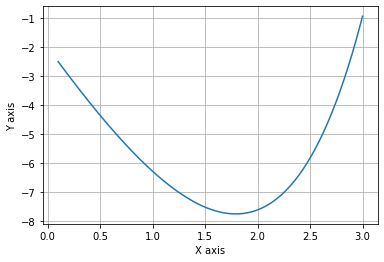

In [2]:
x = np.arange(-10, 10, 0.001)
y =  x ** 3 +3*x**
plt.plot(x,y)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.grid()
plt.show()

In [60]:
x = Symbol('x')
function =x ** 3 +3*x**2-1


In [61]:
def fun_val_in_x(function, x_val):
    function = lambdify(x, function)
    return function(x_val) 

In [62]:
def fun_derivative(function, orderliness):
    while orderliness > 0:
        function = function.diff(x)
        orderliness -= 1
    return function

In [63]:
def condition_1_fb(a, b, func):
    result = True
    for i in np.arange(a, b+1, 0.01):
        if fun_val_in_x(func, b) * fun_val_in_x(fun_derivative(func, 2), i) <= 0:
            result = False
            break
    return result

In [64]:
def condition_2_fa(a, b, func):
    result = True
    for i in np.arange(a, b+1, 0.01):
        if fun_val_in_x(func, a) * fun_val_in_x(fun_derivative(func, 2), i) <= 0:
            result = False
            break
    return result

In [65]:
def chords_formula_1(b, x_n, func):
    return x_n - (fun_val_in_x(func, x_n) / (fun_val_in_x(func, b) - fun_val_in_x(func, x_n)) * (b - x_n))

In [66]:
def chords_formula_2(a, x_n, func):
    return a - (fun_val_in_x(func, a) / (fun_val_in_x(func, x_n) - fun_val_in_x(func, a)) * (x_n - a))

In [67]:
def tangential_formula(x_n, func):
    return x_n - (fun_val_in_x(func, x_n) / fun_val_in_x(fun_derivative(func, 1), x_n))

In [82]:
def method_chords(a, b, func, eps):
    counter_iteration_chords = 0  
    x_n = 0
    x_n_1 = 0
    if condition_1_fb(a, b, func):
        x_n = a 
        x_n_1 = chords_formula_1(b, x_n, func)
        counter_iteration_chords += 1
        while abs(x_n_1 - x_n) >= eps: 
            x_n = x_n_1 
            x_n_1 = chords_formula_1(b, x_n, func)
            counter_iteration_chords += 1
        return x_n_1, counter_iteration_chords

    elif condition_2_fa(a, b, func):
        x_n = b
        x_n_1 = chords_formula_2(a, x_n, func)
        counter_iteration_chords += 1
        while abs(x_n_1 - x_n) >= eps: 
            x_n = x_n_1 
            x_n_1 = chords_formula_2(a, x_n, func)
            counter_iteration_chords += 1
        return x_n_1, counter_iteration_chords
    
mylist = []
result = method_chords(0, 1, function, 0.001)
mylist.append(result)
a,b = zip(*mylist)
print('\033[1m           Method Chords(hord)')
print ('\033[0m', '*'* 50)
print('\033[1m Result = ', '\033[0m',  a[0])
print('\033[1m Number of iterations = ', '\033[0m',  b[0])

           Method Chords(hord)
 **************************************************
 Result =   0.5317293823231886
 Number of iterations =   8


In [83]:
def method_tangential(a, b, func, eps):
    counter_iteration_dotuchnuh = 0
    x_n = 0
    x_n_1 = 0
    if condition_1_fb(a, b, func):
        x_n = b
        x_n_1 = tangential_formula(x_n, func);
        counter_iteration_dotuchnuh += 1
        while abs(x_n_1 - x_n) >= eps: 
            x_n = x_n_1 
            x_n_1 = tangential_formula(x_n, func)
            counter_iteration_dotuchnuh += 1
        return x_n_1, counter_iteration_dotuchnuh

    elif condition_2_fa(a, b, func):
        x_n = a
        x_n_1 = tangential_formula(x_n, func)
        counter_iteration_dotuchnuh += 1
        while abs(x_n_1 - x_n) >= eps: 
            x_n = x_n_1 
            x_n_1 = tangential_formula(x_n, func)
            counter_iteration_dotuchnuh += 1
        return x_n_1, counter_iteration_dotuchnuh
    
mylist = []
result = method_tangential(-3, -2, function, 0.001)
mylist.append(result)
#print(mylist)
a,b = zip(*mylist)
print('\033[1m      Method Tangential (dotuchnuh)')
print ('\033[0m', '*'* 50)
print('\033[1m Result = ', '\033[0m',  a[0])
print('\033[1m Number of iterations = ', '\033[0m',  b[0]) 

      Method Tangential (dotuchnuh)
 **************************************************
 Result =   -2.8793852448366706
 Number of iterations =   3


<IPython.core.display.Javascript object>


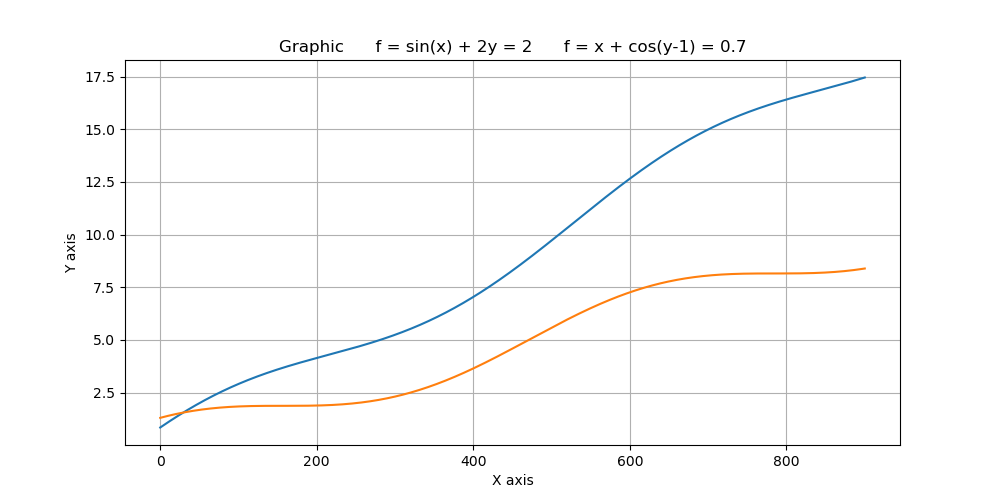

In [15]:
x = np.arange(1, 10.01, 0.01)
y = np.arange(1, 10.01, 0.01)
plt.figure(figsize=(10, 5))
plt.plot(np.sin(x) + 2 * y - 2)
plt.plot(x + np.cos(y-1) - 0.7)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title('Graphic      f = sin(x) + 2y = 2      f = x + cos(y-1) = 0.7')
plt.grid(True)
plt.show()